In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'MS Dhoni ODI Batting.csv')

In [4]:
df

,Match,Date,Match No.,Runs,Balls,Mins,4s,6s,Ct,St
0,India in Bangladesh 2015 (2nd ODI),21st June 2015,264,47.0,75.0,112,3,-,1,0
1,India in Bangladesh 2015 (1st ODI),18th June 2015,263,5.0,7.0,13,-,-,0,0
2,ICC World Cup 2014/15 (Semi-Final),26th March 2015,262,65.0,65.0,94,3,2,0,0
3,ICC World Cup 2014/15 (Quarter-Final),19th March 2015,261,6.0,11.0,0,-,-,4,0
4,ICC World Cup 2014/15 (Pool B),14th March 2015,260,85.0,76.0,113,8,2,2,0
...,...,...,...,...,...,...,...,...,...,...
259,"Pakistan in India: 2nd ODI, 2004/05",5-Apr-05,5,148.0,123.0,155,15,4,2,0
260,"Pakistan in India: 1st ODI, 2004/05",2-Apr-05,4,3.0,7.0,-,-,-,0,0
261,"India in Bangladesh: 3rd ODI, 2004/05",27-Dec-04,3,7.0,2.0,2,-,1,3,2
262,"India in Bangladesh: 2nd ODI, 2004/05",26-Dec-04,2,12.0,11.0,16,2,-,1,0


In [5]:
df.count()

Match        232
Date         232
Match No.    264
Runs         230
Balls        230
Mins         225
4s           230
6s           230
Ct           264
St           264
dtype: int64

In [10]:
df["Runs"].max()

183.0

In [40]:
df = df.dropna()
list = []
for i in range(200):
    a = df[df["Runs"]>=i]
    b = a[a['Runs']<i+1]
    list.append(b["Runs"].count())
len(list)

200

In [41]:
a = list

In [42]:
len(a)

200

In [45]:
dic = {
    "A":pd.Series(a),
    "B":np.arange(0,200,1),
}

In [46]:
l = pd.DataFrame(dic)

In [53]:
l

,A,B
0,6,0
1,1,1
2,7,2
3,3,3
4,3,4
...,...,...
195,0,195
196,0,196
197,0,197
198,0,198


Text(0.5, 1.0, 'Probability Distribution of MS DHONI.')

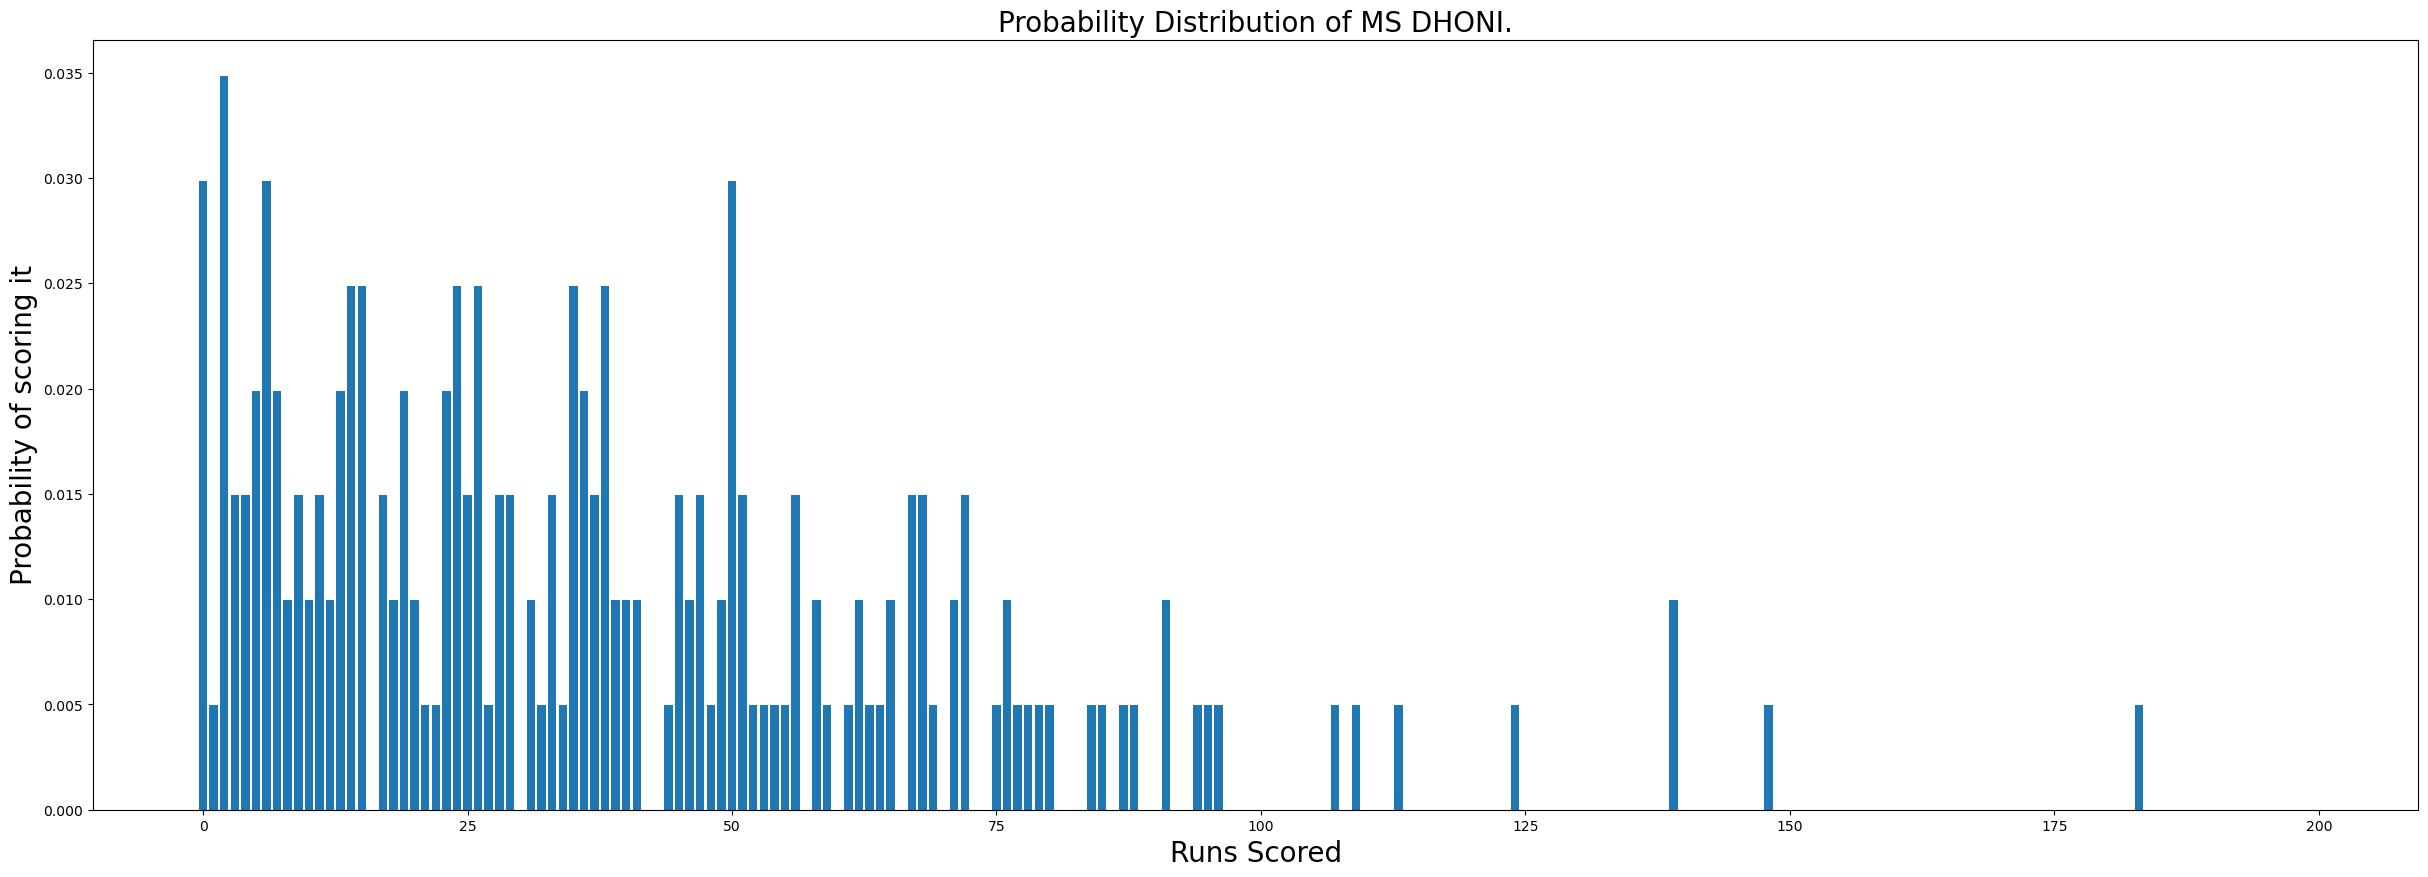

In [54]:

l["C"] = l["A"]/(df["Match"].count())
values = l["B"]
a = plt.figure(figsize=(30,10))
plt.bar(values,l["C"])
plt.xlabel("Runs Scored",size =20)
plt.ylabel("Probability of scoring it" , size =20)
plt.title("Probability Distribution of MS DHONI.",size =20)

In [55]:
a1 = df["Runs"].mean()
b1 = df['Runs'].mode()
c1 = df['Runs'].median()

In [56]:
print(f"Mean  : {a1}\nMode : {b1}\nMedian : {c1}")

Mean  : 38.014925373134325
Mode : 0    2.0
Name: Runs, dtype: float64
Median : 33.0


In [57]:
a = pd.Series(df["Runs"])
a1 = a.fillna(0)
dev = 0
dev1 = 0
mean = a.mean()
for i in a1:
    dev += (i-mean)**3
    dev1 += (i-mean)**4
skewness = dev/((a.count()-1)*(a.std()**3))
kurtosis = (dev1/((a.count()-1)*(a.std()**4))) - 3

In [58]:
print(f"Skewness : {skewness} \nKurtosis : {kurtosis}")

Skewness : 1.333293679534123 
Kurtosis : 2.4603895440009245


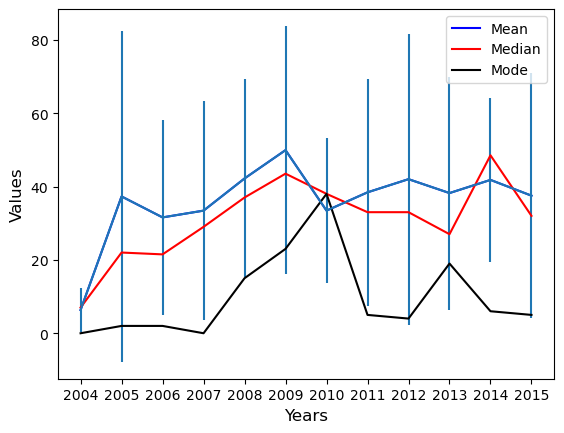

In [89]:
df["Proper Date"] = pd.to_datetime(df["Date"])
df['Year'] = df['Proper Date'].dt.strftime('%Y')
b = df.groupby(by=df["Year"])
meanyear = b["Runs"].mean()
medianyear = b["Runs"].median()
stdyear = b["Runs"].std()
a = b["Runs"].apply(pd.Series.mode)
list=[]
for i in meanyear.index:
    list.append(a[i][0])
plt.plot(meanyear , "b",label = "Mean")
plt.errorbar(meanyear.index,meanyear,yerr = stdyear)
plt.plot(medianyear, "r",label = "Median")
plt.plot(meanyear.index,list , "black" , label = "Mode")
plt.xlabel("Years",fontsize=12)
plt.ylabel("Values",fontsize=12)
plt.legend()

In [93]:
a = df["Date"][1]


['18th', 'June', '2015']

In [87]:
a = s["Date"].apply(pd.Series.mode)

In [102]:
df["MonthYear"] = df["Proper Date"].dt.strftime("%m""-""%Y")
df

,Match,Date,Match No.,Runs,Balls,Mins,4s,6s,Ct,St,Proper Date,Year,MonthYear
0,India in Bangladesh 2015 (2nd ODI),21st June 2015,264,47.0,75.0,112,3,-,1,0,2015-06-21,2015,06-2015
1,India in Bangladesh 2015 (1st ODI),18th June 2015,263,5.0,7.0,13,-,-,0,0,2015-06-18,2015,06-2015
2,ICC World Cup 2014/15 (Semi-Final),26th March 2015,262,65.0,65.0,94,3,2,0,0,2015-03-26,2015,03-2015
3,ICC World Cup 2014/15 (Quarter-Final),19th March 2015,261,6.0,11.0,0,-,-,4,0,2015-03-19,2015,03-2015
4,ICC World Cup 2014/15 (Pool B),14th March 2015,260,85.0,76.0,113,8,2,2,0,2015-03-14,2015,03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Pakistan in India: 2nd ODI, 2004/05",5-Apr-05,5,148.0,123.0,155,15,4,2,0,2005-04-05,2005,04-2005
260,"Pakistan in India: 1st ODI, 2004/05",2-Apr-05,4,3.0,7.0,-,-,-,0,0,2005-04-02,2005,04-2005
261,"India in Bangladesh: 3rd ODI, 2004/05",27-Dec-04,3,7.0,2.0,2,-,1,3,2,2004-12-27,2004,12-2004
262,"India in Bangladesh: 2nd ODI, 2004/05",26-Dec-04,2,12.0,11.0,16,2,-,1,0,2004-12-26,2004,12-2004


In [157]:
okk = df.groupby(by =df["MonthYear"])
meanyear = okk["Runs"].mean()
medianyear = okk["Runs"].median()
stdyear = okk["Runs"].std()
a = okk.apply(pd.DataFrame.mode)
a["Events"] = a["Match"]
a[""]